# DNSC 6301 Project
### Victoria Abel

In [1]:
#Python imports
from sklearn import tree                                  # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split      # for partitioning data
from sklearn.model_selection import cross_val_score       # for cross validation
from sklearn.metrics import roc_auc_score, accuracy_score # to assess decision tree perforamce          

import numpy as np                                   # array, vector, matrix calculations
import pandas as pd                                  # dataFrame handling

from matplotlib import pyplot as plt                 # plotting
import seaborn as sns                                # slightly better plotting  

SEED = 12345                                         # ALWAYS use a random seed for better reproducibility

In [2]:
#finding the software version
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
#uploading data and storing it in object data
data = pd.read_csv('/Users/victoria/Documents/6301_Project/credit_line_increase.csv')
data

ID  LIMIT_BAL  SEX  RACE  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0          1      20000    2   1.0          2         1   24      2      2   
1          2     120000    2   2.0          2         2   26     -1      2   
2          3      90000    2   3.0          2         2   34      0      0   
3          4      50000    2   4.0          2         1   37      0      0   
4          5      50000    1   3.0          2         1   57     -1      0   
...      ...        ...  ...   ...        ...       ...  ...    ...    ...   
29995  29996     220000    1   4.0          3         1   39      0      0   
29996  29997     150000    1   4.0          3         2   43     -1     -1   
29997  29998      30000    1   1.0          2         2   37      4      3   
29998  29999      80000    1   2.0          3         1   41      1     -1   
29999  30000      50000    1   2.0          2         1   46      0      0   

       PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4         -1  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997      2  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DELINQ_NEXT  
0             0         0         0         0            1  
1          1000      1000         0      2000            1  
2          1000      1000      1000      5000            0  
3          1200      1100      1069      1000            0  
4         10000      9000       689       679            0  
...         ...       ...       ...       ...          ...  
29995      5003      3047      5000      1000            0  
29996      8998       129         0         0            0  
29997     22000      4200      2000      3100            1  
29998      1178      1926     52964      1804            1  
29999      1430      1000      1000      1000            1  

[30000 rows x 26 columns]

In [4]:
#finds the keys
data.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [5]:
#shows the type of data
type(data)

pandas.core.frame.DataFrame

In [6]:
#shows the data shape rows by columns
data.shape

(30000, 26)

### Load and Analyze Data

In [7]:
#names of columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [8]:
#determine missing values
#there are no missing values because each column identifier is labelled false
data.isnull().any()

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [9]:
#basic descriptive statistics for each column
data.describe()

ID       LIMIT_BAL           SEX          RACE     EDUCATION  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      2.721967      1.853133   
std     8660.398374   129747.661567      0.489129      1.094397      0.790349   
min        1.000000    10000.000000      1.000000      1.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      2.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      3.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      4.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      6.000000   

           MARRIAGE           AGE         PAY_0         PAY_2         PAY_3  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.551867     35.485500     -0.016700     -0.133767     -0.166200   
std        0.521970      9.217904      1.123802      1.197186      1.196868   
min        0.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%        1.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%        2.000000     34.000000      0.000000      0.000000      0.000000   
75%        2.000000     41.000000      0.000000      0.000000      0.000000   
max        3.000000     79.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6   DELINQ_NEXT  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 26 columns]

In [10]:
#Pearson correlation matrix 
corr = data.corr() 
corr

ID  LIMIT_BAL       SEX      RACE  EDUCATION  MARRIAGE  \
ID           1.000000   0.026179  0.018497 -0.000710   0.039177 -0.029079   
LIMIT_BAL    0.026179   1.000000  0.024755  0.044173  -0.219161 -0.108139   
SEX          0.018497   0.024755  1.000000  0.006149   0.014232 -0.031389   
RACE        -0.000710   0.044173  0.006149  1.000000  -0.012796  0.007010   
EDUCATION    0.039177  -0.219161  0.014232 -0.012796   1.000000 -0.143464   
MARRIAGE    -0.029079  -0.108139 -0.031389  0.007010  -0.143464  1.000000   
AGE          0.018678   0.144713 -0.090874  0.001284   0.175061 -0.414170   
PAY_0       -0.030575  -0.271214 -0.057643 -0.102487   0.105364  0.019917   
PAY_2       -0.011215  -0.296382 -0.070771 -0.082986   0.121566  0.024199   
PAY_3       -0.018494  -0.286123 -0.066096 -0.074547   0.114025  0.032688   
PAY_4       -0.002735  -0.267460 -0.060173 -0.072259   0.108793  0.033122   
PAY_5       -0.022199  -0.249411 -0.055064 -0.067316   0.097520  0.035629   
PAY_6       -0.020270  -0.235195 -0.044008 -0.054935   0.082316  0.034345   
BILL_AMT1    0.019389   0.285430 -0.033642  0.004232   0.023581 -0.023472   
BILL_AMT2    0.017982   0.278314 -0.031183  0.002459   0.018749 -0.021602   
BILL_AMT3    0.024354   0.283236 -0.024563  0.000543   0.013002 -0.024909   
BILL_AMT4    0.040351   0.293988 -0.021880  0.000376  -0.000451 -0.023344   
BILL_AMT5    0.016705   0.295562 -0.017005  0.002096  -0.007567 -0.025393   
BILL_AMT6    0.016730   0.290389 -0.016733  0.002756  -0.009099 -0.021207   
PAY_AMT1     0.009742   0.195236 -0.000242  0.030069  -0.037456 -0.005979   
PAY_AMT2     0.008406   0.178408 -0.001391  0.012681  -0.030038 -0.008093   
PAY_AMT3     0.039151   0.210167 -0.008597  0.021854  -0.039943 -0.003541   
PAY_AMT4     0.007793   0.203242 -0.002229  0.026047  -0.038218 -0.012659   
PAY_AMT5     0.000652   0.217202 -0.001667  0.022148  -0.040358 -0.001205   
PAY_AMT6     0.003000   0.219595 -0.002766  0.020259  -0.037200 -0.006641   
DELINQ_NEXT -0.013952  -0.153520 -0.039961 -0.303811   0.028006 -0.024339   

                  AGE     PAY_0     PAY_2     PAY_3  ...  BILL_AMT4  \
ID           0.018678 -0.030575 -0.011215 -0.018494  ...   0.040351   
LIMIT_BAL    0.144713 -0.271214 -0.296382 -0.286123  ...   0.293988   
SEX         -0.090874 -0.057643 -0.070771 -0.066096  ...  -0.021880   
RACE         0.001284 -0.102487 -0.082986 -0.074547  ...   0.000376   
EDUCATION    0.175061  0.105364  0.121566  0.114025  ...  -0.000451   
MARRIAGE    -0.414170  0.019917  0.024199  0.032688  ...  -0.023344   
AGE          1.000000 -0.039447 -0.050148 -0.053048  ...   0.051353   
PAY_0       -0.039447  1.000000  0.672164  0.574245  ...   0.179125   
PAY_2       -0.050148  0.672164  1.000000  0.766552  ...   0.222237   
PAY_3       -0.053048  0.574245  0.766552  1.000000  ...   0.227202   
PAY_4       -0.049722  0.538841  0.662067  0.777359  ...   0.245917   
PAY_5       -0.053826  0.509426  0.622780  0.686775  ...   0.271915   
PAY_6       -0.048773  0.474553  0.575501  0.632684  ...   0.266356   
BILL_AMT1    0.056239  0.187068  0.234887  0.208473  ...   0.860272   
BILL_AMT2    0.054283  0.189859  0.235257  0.237295  ...   0.892482   
BILL_AMT3    0.053710  0.179785  0.224146  0.227494  ...   0.923969   
BILL_AMT4    0.051353  0.179125  0.222237  0.227202  ...   1.000000   
BILL_AMT5    0.049345  0.180635  0.221348  0.225145  ...   0.940134   
BILL_AMT6    0.047613  0.176980  0.219403  0.222327  ...   0.900941   
PAY_AMT1     0.026147 -0.079269 -0.080701  0.001295  ...   0.233012   
PAY_AMT2     0.021785 -0.070101 -0.058990 -0.066793  ...   0.207564   
PAY_AMT3     0.029247 -0.070561 -0.055901 -0.053311  ...   0.300023   
PAY_AMT4     0.021379 -0.064005 -0.046858 -0.046067  ...   0.130191   
PAY_AMT5     0.022850 -0.058190 -0.037093 -0.035863  ...   0.160433   
PAY_AMT6     0.019478 -0.058673 -0.036500 -0.035861  ...   0.177637   
DELINQ_NEXT  0.013890  0.324794  0.263551  0.235253  ...  -0.010156   

             BILL_AMT

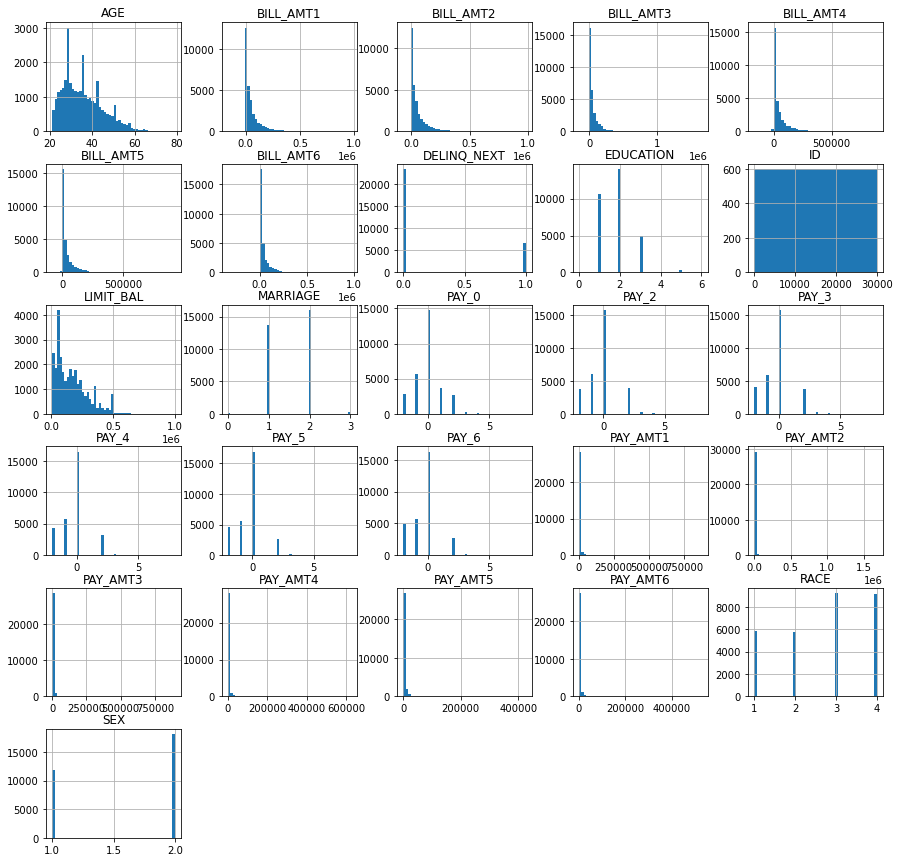

In [11]:
#Histograms for all of the column data
_ = data[data.columns].hist(bins=50, figsize=(15, 15)) 

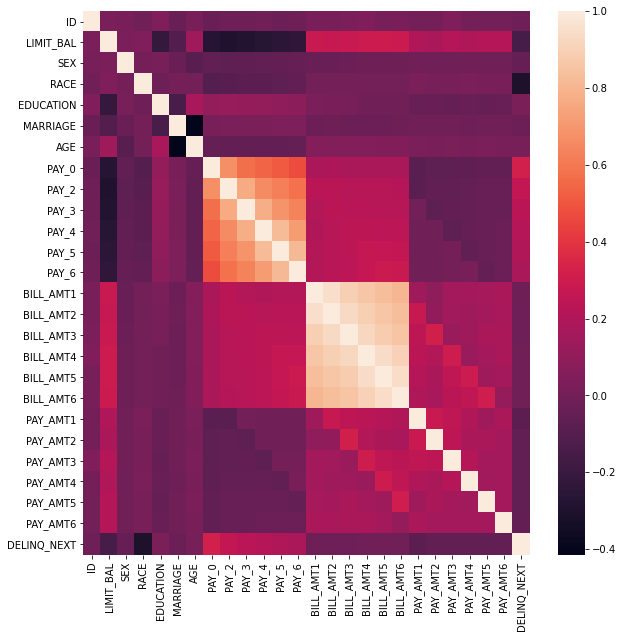

In [12]:
#heatmap of the correlations
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

### Train a Decision Tree Model

In [13]:
# assign basic modeling roles
# assigning the x and y variables not including demographic information
y_name = 'DELINQ_NEXT'
X_names = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [14]:
# partition data between train, validation, and test
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_names], data[y_name], test_size=0.5, random_state=SEED) # split off training data
valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED) # split remainder into validation and test

# summarize 
print('Training data: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1] + 1))
print('Validation data: %i rows and %i columns' % (valid_X.shape[0], valid_X.shape[1] + 1))
print('Testing data: %i rows and %i columns' % (test_X.shape[0], test_X.shape[1] + 1))

# housekeeping
del valid_test_X 
del valid_test_y

Training data: 15000 rows and 20 columns
Validation data: 7500 rows and 20 columns
Testing data: 7500 rows and 20 columns


In [15]:
# train decision tree 
# with validation-based early stopping
# set max depth for the model as 12
max_depth = 12
candidate_models = {}

# for loop for depths 0 to 12
# stores a decision tree classifier including Training AUC, Validation AUC, and 5-Fold SD
for depth in range(0, max_depth):

  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_X, train_y)

  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1]

  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std

In [16]:
#finds the hyperparameters
candidate_models[6]['Model']

DecisionTreeClassifier(max_depth=6, random_state=12345)

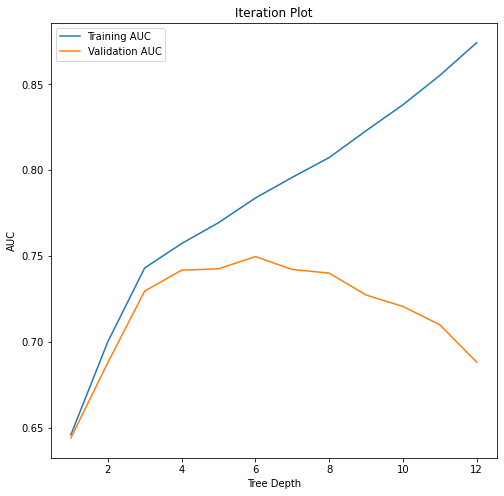

In [17]:
# plot tree depth vs. training and validation AUC
# using simple pandas plotting and matplotlib
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
# inclue training and validation AUC
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot',
                                                               ax=ax)
# set x axis as tree depth and y axis as AUC
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')
# from the graph it appears that a tree depth of 6 is the best model because at depth 7 Validation AUC starts to deccrease

In [18]:
# vieww same results as a table, using pandas iloc to remove first column of table
candidate_results.iloc[:, 1:]
# this table confirms that Validation AUC starts dropping after depth 6, therefore 6 is the best model

Training AUC  Validation AUC  5-Fold SD
1       0.645748        0.643880   0.009275
2       0.699912        0.687752   0.012626
3       0.742968        0.729490   0.017375
4       0.757178        0.741696   0.017079
5       0.769331        0.742480   0.019886
6       0.783722        0.749610   0.017665
7       0.795777        0.742115   0.022466
8       0.807291        0.739990   0.015567
9       0.822913        0.727224   0.012042
10      0.838052        0.720562   0.013855
11      0.855168        0.709864   0.010405
12      0.874251        0.688074   0.008073

In [19]:
# plots the tree for human interpretation
best_model = candidate_models[6]['Model']
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=X_names,
                   class_names=['On time', 'Delinquent'],
                   filled=True)

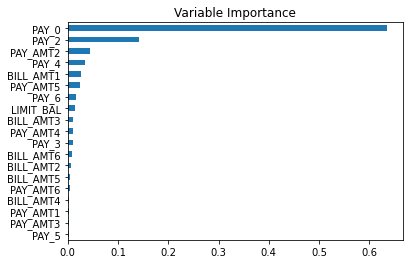

In [20]:
# plot variable importances
# create pandas dataframe
# plot dataframe values
importances = pd.DataFrame(best_model.feature_importances_,
                           index=X_names,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', title='Variable Importance', legend=False)
# this plot shows that PAY_0 is contributing is significantly more important than the other variables which means the model bases a majority of the decision making on this one variable 

In [21]:
# score on test data for the model
test_phat = best_model.predict_proba(test_X)[:, 1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7438


### Test the Model for Discrimination

In [22]:
# function to produce confusion matrices based on given inputs
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

    level_list = list(frame[y].unique())
    level_list.sort(reverse=True)

    cm_frame = pd.DataFrame(columns=['actual: ' +  str(i) for i in level_list],
                            index=['predicted: ' + str(i) for i in level_list])

    frame_ = frame.copy(deep=True)

    dname = 'd_' + str(y)
    frame_[dname] = np.where(frame_[yhat] > cutoff , 1, 0)

    if (by is not None) & (level is not None):
        frame_ = frame_[frame[by] == level]

    for i, lev_i in enumerate(level_list):
        for j, lev_j in enumerate(level_list):
            cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[dname] == lev_j)].shape[0]

    if verbose:
        if by is None:
            print('Confusion matrix:')
        else:
            print('Confusion matrix by ' + by + '=' + str(level))

    return cm_frame

In [23]:
# function for AIR using the confusion matrices
def air(cm_dict, reference_key, protected_key, verbose=True):

    eps = 1e-20

    reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1])
    reference_total = float(cm_dict[reference_key].sum().sum())
    reference_prop = reference_accepted/reference_total
    if verbose:
        print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)

    protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) 
    protected_total = float(cm_dict[protected_key].sum().sum())
    protected_prop = protected_accepted/protected_total
    if verbose:
        print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)

    return ((protected_prop + eps)/(reference_prop + eps))

In [24]:
# add probabilities onto validation set
# note we need a probability cutoff to make a final lending decision
valid_yhat = pd.DataFrame(valid_X, columns=X_names)
valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name]  = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_X)[:, 1]
valid_yhat.head()
# this code attaches a probability of delinquency
# the cutoff will determine if an individual is predicted to be delinquent or on time
# below the cutoff: the individual is on time
# above the cutoff: the individual is late/delinquent

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
10752     470000      0      0      0      0      0      0     181224   
24174     260000     -1      0      0      0      0      0     182329   
13524      80000      0      0      0      0      0      0      78009   
13049      50000      1      2      0      0      0      0      51421   
23427     200000      1      2      0      0      0      0      18021   

       BILL_AMT2  BILL_AMT3  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
10752     143173     145293  ...      7000      6000      6000      6000   
24174     181133     177351  ...     10000     10000     10000     10000   
13524      78616      49662  ...      2420      2000      1656      1693   
13049      50322      49741  ...         0      1379       945      2002   
23427      17374      15463  ...         0      3027      6223         0   

       PAY_AMT5  PAY_AMT6  RACE  SEX  DELINQ_NEXT      phat  
10752      6000      8000   3.0    1            0  0.070193  
24174     10000     17000   1.0    1            0  0.070193  
13524      1767      1581   3.0    2            0  0.119735  
13049      2008      1002   3.0    2            1  0.372789  
23427         0         0   3.0    2            0  0.372789  

[5 rows x 23 columns]

In [25]:
# calculate confusion matrices across race groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
race_dict = {'hispanic': 1,
             'black': 2,
             'white': 3,
             'asian': 4}

race_group_names = list(race_dict.keys())
race_cm_dict = {}

for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.15)
    print(race_cm_dict[name])
    print('(%s)' % name.title())
    print()

for name in race_group_names:
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()
# These confusion matrices show the actual delinquency vs the predicted delinquency
# the AIR shows the ratio between the protected classes vs the unprotected class
# hispanic-to-white AIR: 0.76, this is. problematic because the AIR should be above .8 to show a lack of bias
# this AIR shows the Hispanic individuals were less likely to be predicted on time compared to White individuals 

Confusion matrix by RACE=1
             actual: 1 actual: 0
predicted: 1       447       387
predicted: 0       139       501
(Hispanic)

Confusion matrix by RACE=2
             actual: 1 actual: 0
predicted: 1       449       348
predicted: 0       157       537
(Black)

Confusion matrix by RACE=3
             actual: 1 actual: 0
predicted: 1       176       813
predicted: 0        72      1228
(White)

Confusion matrix by RACE=4
             actual: 1 actual: 0
predicted: 1       186       784
predicted: 0        59      1217
(Asian)

White proportion accepted: 0.568
Hispanic proportion accepted: 0.434
hispanic-to-white AIR: 0.76

White proportion accepted: 0.568
Black proportion accepted: 0.465
black-to-white AIR: 0.82

White proportion accepted: 0.568
Asian proportion accepted: 0.568
asian-to-white AIR: 1.00



In [26]:
# calculate confusion matrices across sex groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
sex_dict = {'male': 1,
            'female': 2}

sex_group_names = list(sex_dict.keys())
sex_cm_dict = {}

for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.15)
    print(sex_cm_dict[name])
    print('(%s)' % name.title())
    print()

for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()
# the female-to-male AIR is 1.06, which is not problematic as it shows women were not less likely to be predicted as one time compared to men 

Confusion matrix by SEX=1
             actual: 1 actual: 0
predicted: 1       546       905
predicted: 0       179      1292
(Male)

Confusion matrix by SEX=2
             actual: 1 actual: 0
predicted: 1       712      1427
predicted: 0       248      2191
(Female)

Male proportion accepted: 0.503
Female proportion accepted: 0.533
female-to-male AIR: 1.06



In [27]:
# function to calculate accuracy at a certain probability cutoff
def get_acc(frame, cutoff, y_name, yhat_name):

  temp = frame.copy(deep=True) 
  temp['decision'] = np.where(temp[yhat_name] > cutoff , 1, 0)
  acc = accuracy_score(temp[y_name], temp['decision'])
  del temp
  return acc
# this code defines a function to get the accuracy of the predictions based on a specific cutoff

In [28]:
# observe accuracy trend as cutoff increases
# the problem is: higher cutoff means lending more money, even if more accurate
for cutoff in np.arange(0.1, 0.31, 0.01):
  print('Accuracy at cutoff %.2f is: %.4f' % (np.round(cutoff, 2), 
                                              get_acc(valid_yhat, np.round(cutoff, 2), y_name, 'phat')))  
# The best choice for a new cuttof is .18 based on the output
# .18 shows a rather large increase of accuracy compared to .17, while only is slightly less accurate than .19
# This is the best choice because it is fairly accurate without allowing for over-accpetance causing the bank to lend more money

Accuracy at cutoff 0.10 is: 0.4463
Accuracy at cutoff 0.11 is: 0.4907
Accuracy at cutoff 0.12 is: 0.6321
Accuracy at cutoff 0.13 is: 0.6321
Accuracy at cutoff 0.14 is: 0.6321
Accuracy at cutoff 0.15 is: 0.6321
Accuracy at cutoff 0.16 is: 0.6321
Accuracy at cutoff 0.17 is: 0.6321
Accuracy at cutoff 0.18 is: 0.7384
Accuracy at cutoff 0.19 is: 0.7631
Accuracy at cutoff 0.20 is: 0.7631
Accuracy at cutoff 0.21 is: 0.7631
Accuracy at cutoff 0.22 is: 0.7631
Accuracy at cutoff 0.23 is: 0.7631
Accuracy at cutoff 0.24 is: 0.7631
Accuracy at cutoff 0.25 is: 0.7716
Accuracy at cutoff 0.26 is: 0.7716
Accuracy at cutoff 0.27 is: 0.7716
Accuracy at cutoff 0.28 is: 0.7716
Accuracy at cutoff 0.29 is: 0.7716
Accuracy at cutoff 0.30 is: 0.7743


In [29]:
# recalculate AIR and confusion matrices at cuttof of .18
for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.18, verbose=False)

for name in race_group_names:
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()

for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.18, verbose=False)

for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()
# A higher cutoff will accept more individuals and hopefully decrease the bias found earlier by accepting more individuals to increase AIR
# The output shows a lack of bias as all AIR are above .8    

White proportion accepted: 0.735
Hispanic proportion accepted: 0.613
hispanic-to-white AIR: 0.83

White proportion accepted: 0.735
Black proportion accepted: 0.626
black-to-white AIR: 0.85

White proportion accepted: 0.735
Asian proportion accepted: 0.739
asian-to-white AIR: 1.00

Male proportion accepted: 0.682
Female proportion accepted: 0.696
female-to-male AIR: 1.02



In [30]:
# redo model search with new information
# train decision tree 
# with validation-based early stopping
# and AIR calculation!
max_depth = 12
candidate_models = {}

for depth in range(0, max_depth):

  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_X, train_y)
  
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1]

  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  valid_yhat = pd.DataFrame(valid_X, columns=X_names)
  valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
  valid_yhat[y_name] = valid_y
  valid_yhat['phat'] = valid_phat
  cm_dict = {}
  cm_dict['white'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=3, cutoff=0.18, verbose=False)
  cm_dict['hispanic'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=1, cutoff=0.18, verbose=False)
  valid_hispanic_air = air(cm_dict, 'white', 'hispanic', verbose=False)

  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std
  candidate_models[depth + 1]['Hispanic-to-White AIR'] = valid_hispanic_air
    
# this model includes the confusion matrix predictions at the cutoff of .18
# it also includes the Hispanic-to-White AIR  for each tree depth


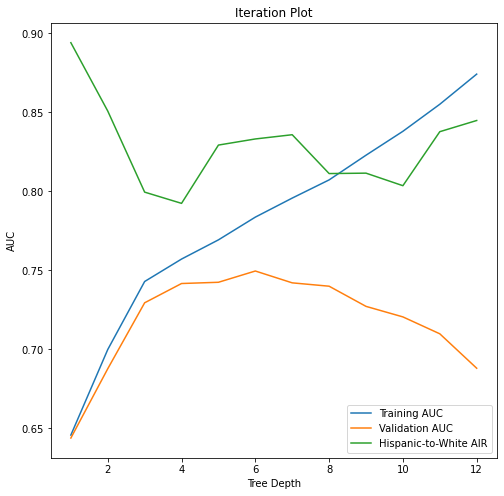

In [31]:
# plot tree depth vs. training and validation AUC and AIR
# using simple pandas plotting and matplotlib
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC', 'Hispanic-to-White AIR']].plot(title='Iteration Plot',
                                                                                        ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

In [32]:
# prints the decision tree of the final model
best_model = candidate_models[6]['Model']
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=X_names,
                   class_names=['On time', 'Delinquent'],
                   filled=True)

In [33]:
# prints the test score of the model
test_phat = best_model.predict_proba(test_X)[:, 1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7438
